In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

import asymNdimPdf as apdf
import pandas as pd

def getErrorFromParam(mu, sigma, alpha):
    '''
    return cVal -eNeg +ePos measurement from a skewnormal
    distribution.
    '''
    
    sn = apdf.ndimSkewNormal(mu=mu, sigma=sigma, alpha=alpha)
    mode = sn.mode1D()
    std  = sn.std1D()
    
    def beMin(x, CL=0.68):
        eNeg, ePos = x
        cl = sn.interval1D(mode-eNeg, mode+ePos)
        penalty = ( sn.pdf(mode-eNeg) - sn.pdf(mode+ePos) )**2
        return np.abs(cl-CL) + np.abs(penalty)
    
    x0 = [std, std]
    res = optimize.minimize(beMin, x0, tol=1e-3, method='Nelder-Mead')
    eNeg, ePos = res.x
    
    return mode, eNeg, ePos

In [14]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [4]:
alphas = np.linspace(-10, 10, 1000)
meas   = np.array([getErrorFromParam(0, 1, a) for a in alphas])
meas2  = np.array([getErrorFromParam(0, 5, a) for a in alphas])

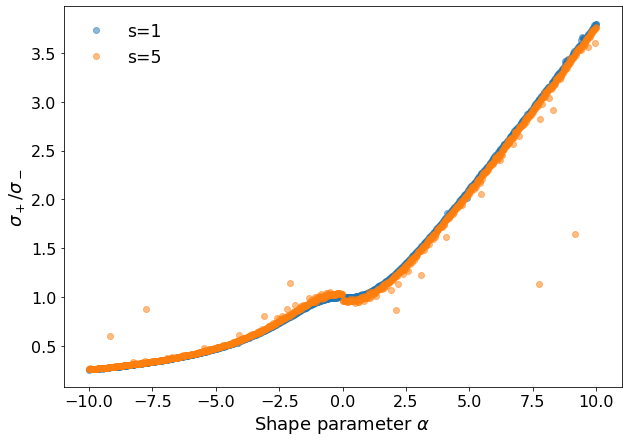

In [29]:
eNeg, ePos   = meas[:, 1], meas[:, 2]
eNeg2, ePos2 = meas2[:, 1], meas2[:, 2]

plt.plot(alphas, (ePos/eNeg) , 'o', label='s=1', alpha=0.5);
plt.plot(alphas, (ePos2/eNeg2), 'o', label='s=5', alpha=0.5);
plt.xlabel('Shape parameter $\\alpha$')
plt.ylabel('$\\sigma_+ / \\sigma_-$')
plt.legend();

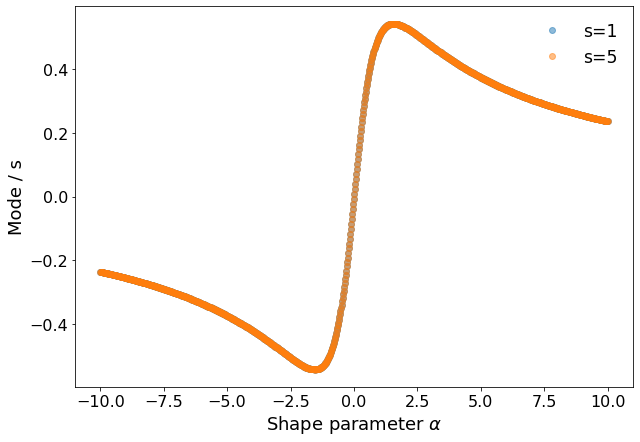

In [16]:
plt.plot(alphas, meas[:, 0], 'o', label='s=1', alpha=0.5);
plt.plot(alphas, meas2[:, 0]/5, 'o', label='s=5', alpha=0.5);
plt.xlabel('Shape parameter $\\alpha$')
plt.ylabel('Mode / s')
plt.legend();

In [60]:
alphas = np.linspace(-18, 18, 10000)
meas   = np.array([getErrorFromParam(0, 1, a) for a in alphas])

In [61]:
df = pd.DataFrame(data={
    'alpha'  : alphas, 
    'mode'   : meas[:, 0],
    'neg'    : meas[:, 1],
    'pos'    : meas[:, 2], 
    'pos/neg': meas[:, 2]/meas[:, 1],
})
df.to_csv('ParameterTable.csv')

In [62]:
df.head()

,alpha,mode,neg,pos,pos/neg
0,-18.000000,-0.146987,0.895055,0.135430,0.151309
1,-17.996400,-0.147012,0.895056,0.135430,0.151309
2,-17.992799,-0.147038,0.895057,0.135430,0.151309
3,-17.989199,-0.147063,0.895058,0.135430,0.151309
4,-17.985599,-0.147089,0.895226,0.135329,0.151168


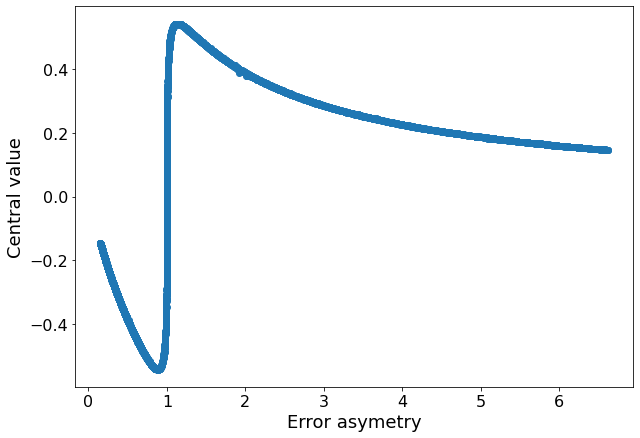

In [63]:
plt.plot(df['pos/neg'], df['mode'], 'o')
plt.xlabel('Error asymetry')
plt.ylabel('Central value');